In [ ]:
# Importing Libraries
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go
import sklearn
import numpy as np

In [ ]:
NSE = yf.Ticker('^NSEI')

In [ ]:
NSE = NSE.history(period = "max")

In [ ]:
NSE

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2007-09-17 00:00:00+05:30,4518.450195,4549.049805,4482.850098,4494.649902,0,0.0,0.0
2007-09-18 00:00:00+05:30,4494.100098,4551.799805,4481.549805,4546.200195,0,0.0,0.0
2007-09-19 00:00:00+05:30,4550.250000,4739.000000,4550.250000,4732.350098,0,0.0,0.0
2007-09-20 00:00:00+05:30,4734.850098,4760.850098,4721.149902,4747.549805,0,0.0,0.0
2007-09-21 00:00:00+05:30,4752.950195,4855.700195,4733.700195,4837.549805,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-06-22 00:00:00+05:30,18853.599609,18886.599609,18759.500000,18771.250000,252700,0.0,0.0
2023-06-23 00:00:00+05:30,18741.849609,18756.400391,18647.099609,18665.500000,210600,0.0,0.0
2023-06-26 00:00:00+05:30,18682.349609,18722.050781,18646.699219,18691.199219,171300,0.0,0.0


In [ ]:
NSE.index

DatetimeIndex(['2007-09-17 00:00:00+05:30', '2007-09-18 00:00:00+05:30',
               '2007-09-19 00:00:00+05:30', '2007-09-20 00:00:00+05:30',
               '2007-09-21 00:00:00+05:30', '2007-09-24 00:00:00+05:30',
               '2007-09-25 00:00:00+05:30', '2007-09-26 00:00:00+05:30',
               '2007-09-27 00:00:00+05:30', '2007-09-28 00:00:00+05:30',
               ...
               '2023-06-15 00:00:00+05:30', '2023-06-16 00:00:00+05:30',
               '2023-06-19 00:00:00+05:30', '2023-06-20 00:00:00+05:30',
               '2023-06-21 00:00:00+05:30', '2023-06-22 00:00:00+05:30',
               '2023-06-23 00:00:00+05:30', '2023-06-26 00:00:00+05:30',
               '2023-06-27 00:00:00+05:30', '2023-06-28 00:00:00+05:30'],
              dtype='datetime64[ns, Asia/Kolkata]', name='Date', length=3868, freq=None)

<Axes: xlabel='Date'>

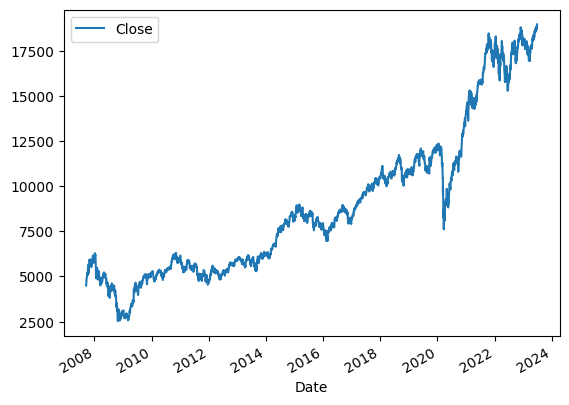

In [ ]:
NSE.plot.line(y="Close", use_index = True)

In [ ]:
del NSE["Dividends"]
del NSE["Stock Splits"]

In [ ]:
NSE["Tomorrow"] = NSE["Close"].shift(-1)

In [ ]:
NSE

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
2007-09-17 00:00:00+05:30,4518.450195,4549.049805,4482.850098,4494.649902,0,4546.200195
2007-09-18 00:00:00+05:30,4494.100098,4551.799805,4481.549805,4546.200195,0,4732.350098
2007-09-19 00:00:00+05:30,4550.250000,4739.000000,4550.250000,4732.350098,0,4747.549805
2007-09-20 00:00:00+05:30,4734.850098,4760.850098,4721.149902,4747.549805,0,4837.549805
2007-09-21 00:00:00+05:30,4752.950195,4855.700195,4733.700195,4837.549805,0,4932.200195
...,...,...,...,...,...,...
2023-06-22 00:00:00+05:30,18853.599609,18886.599609,18759.500000,18771.250000,252700,18665.500000
2023-06-23 00:00:00+05:30,18741.849609,18756.400391,18647.099609,18665.500000,210600,18691.199219
2023-06-26 00:00:00+05:30,18682.349609,18722.050781,18646.699219,18691.199219,171300,18817.400391


In [ ]:
NSE["Target"] = (NSE["Tomorrow"] > NSE['Close']).astype(int)

In [ ]:
NSE

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2007-09-17 00:00:00+05:30,4518.450195,4549.049805,4482.850098,4494.649902,0,4546.200195,1
2007-09-18 00:00:00+05:30,4494.100098,4551.799805,4481.549805,4546.200195,0,4732.350098,1
2007-09-19 00:00:00+05:30,4550.250000,4739.000000,4550.250000,4732.350098,0,4747.549805,1
2007-09-20 00:00:00+05:30,4734.850098,4760.850098,4721.149902,4747.549805,0,4837.549805,1
2007-09-21 00:00:00+05:30,4752.950195,4855.700195,4733.700195,4837.549805,0,4932.200195,1
...,...,...,...,...,...,...,...
2023-06-22 00:00:00+05:30,18853.599609,18886.599609,18759.500000,18771.250000,252700,18665.500000,0
2023-06-23 00:00:00+05:30,18741.849609,18756.400391,18647.099609,18665.500000,210600,18691.199219,1
2023-06-26 00:00:00+05:30,18682.349609,18722.050781,18646.699219,18691.199219,171300,18817.400391,1


In [ ]:
#define ticker and fetch records
stock = input("enter a Ticker\n")
start_date = input("Enter start date to fetch records in yyyy-mm-dd format")
end_date = input("Enter end date to fetch records in yyyy-mm-dd format")

data = yf.download(stock, start = start_date , end = end_date)

print(data)

enter a Ticker
HDFCBANK.NS
Enter start date to fetch records in yyyy-mm-dd format2020-01-01
Enter end date to fetch records in yyyy-mm-dd format2023-06-30
[*********************100%***********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-01-01  1276.099976  1280.000000  1270.599976  1278.599976  1244.189697   
2020-01-02  1279.000000  1288.000000  1279.000000  1286.750000  1252.120483   
2020-01-03  1282.199951  1285.000000  1263.599976  1268.400024  1234.264160   
2020-01-06  1260.000000  1261.800049  1236.000000  1240.949951  1207.552856   
2020-01-07  1258.900024  1271.449951  1252.250000  1260.599976  1226.674072   
...                 ...          ...          ...          ...          ...   
2023-06-22  1640.000000  1657.550049  1639.050049  1643.599976  1643.599976   
2023-06-23  1637.550049  1659.900024  1634.050049  1643.500000  1

In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,1276.099976,1280.000000,1270.599976,1278.599976,1244.189697,1836849
2020-01-02,1279.000000,1288.000000,1279.000000,1286.750000,1252.120483,3068583
2020-01-03,1282.199951,1285.000000,1263.599976,1268.400024,1234.264160,5427775
2020-01-06,1260.000000,1261.800049,1236.000000,1240.949951,1207.552856,5445093
2020-01-07,1258.900024,1271.449951,1252.250000,1260.599976,1226.674072,7362247
...,...,...,...,...,...,...
2023-06-22,1640.000000,1657.550049,1639.050049,1643.599976,1643.599976,28298070
2023-06-23,1637.550049,1659.900024,1634.050049,1643.500000,1643.500000,10669609
2023-06-26,1645.000000,1650.750000,1628.699951,1635.550049,1635.550049,8065157


In [ ]:
df = pd.DataFrame(data)

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,1276.099976,1280.000000,1270.599976,1278.599976,1244.189697,1836849
2020-01-02,1279.000000,1288.000000,1279.000000,1286.750000,1252.120483,3068583
2020-01-03,1282.199951,1285.000000,1263.599976,1268.400024,1234.264160,5427775
2020-01-06,1260.000000,1261.800049,1236.000000,1240.949951,1207.552856,5445093
2020-01-07,1258.900024,1271.449951,1252.250000,1260.599976,1226.674072,7362247


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 868 entries, 2020-01-01 to 2023-06-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       868 non-null    float64
 1   High       868 non-null    float64
 2   Low        868 non-null    float64
 3   Close      868 non-null    float64
 4   Adj Close  868 non-null    float64
 5   Volume     868 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 47.5 KB


In [ ]:
#Making date as a feature
df['date'] = pd.to_datetime(df.index)

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,date
Date,,,,,,,
2020-01-01,1276.099976,1280.000000,1270.599976,1278.599976,1244.189697,1836849,2020-01-01
2020-01-02,1279.000000,1288.000000,1279.000000,1286.750000,1252.120483,3068583,2020-01-02
2020-01-03,1282.199951,1285.000000,1263.599976,1268.400024,1234.264160,5427775,2020-01-03
2020-01-06,1260.000000,1261.800049,1236.000000,1240.949951,1207.552856,5445093,2020-01-06
2020-01-07,1258.900024,1271.449951,1252.250000,1260.599976,1226.674072,7362247,2020-01-07
...,...,...,...,...,...,...,...
2023-06-22,1640.000000,1657.550049,1639.050049,1643.599976,1643.599976,28298070,2023-06-22
2023-06-23,1637.550049,1659.900024,1634.050049,1643.500000,1643.500000,10669609,2023-06-23
2023-06-26,1645.000000,1650.750000,1628.699951,1635.550049,1635.550049,8065157,2023-06-26


In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,date
Date,,,,,,,
2020-01-01,1276.099976,1280.000000,1270.599976,1278.599976,1244.189697,1836849,2020-01-01
2020-01-02,1279.000000,1288.000000,1279.000000,1286.750000,1252.120483,3068583,2020-01-02
2020-01-03,1282.199951,1285.000000,1263.599976,1268.400024,1234.264160,5427775,2020-01-03
2020-01-06,1260.000000,1261.800049,1236.000000,1240.949951,1207.552856,5445093,2020-01-06
2020-01-07,1258.900024,1271.449951,1252.250000,1260.599976,1226.674072,7362247,2020-01-07


In [ ]:
# Making a Candlestick graph
fig = go.Figure(data=[go.Candlestick(x=df['date'],
                                     open= df['Open'],
                                     high = df['High'],
                                     low = df['Low'],
                                     close = df['Close'])])
# Updating the layout
fig.update_layout(
    title = 'Stock Price Chart',
    yaxis_title = 'Price(rupees)',
    xaxis_rangeslider_visible = False
)


fig.show()

In [ ]:
# Dropping date and volume to make it less complex
df.drop(['date', 'Volume'], axis = 1 , inplace = True)

In [ ]:
df.reset_index(drop=True, inplace = True)

In [ ]:
df

,Open,High,Low,Close,Adj Close
0,1276.099976,1280.000000,1270.599976,1278.599976,1244.189697
1,1279.000000,1288.000000,1279.000000,1286.750000,1252.120483
2,1282.199951,1285.000000,1263.599976,1268.400024,1234.264160
3,1260.000000,1261.800049,1236.000000,1240.949951,1207.552856
4,1258.900024,1271.449951,1252.250000,1260.599976,1226.674072
...,...,...,...,...,...
863,1640.000000,1657.550049,1639.050049,1643.599976,1643.599976
864,1637.550049,1659.900024,1634.050049,1643.500000,1643.500000
865,1645.000000,1650.750000,1628.699951,1635.550049,1635.550049
866,1642.949951,1672.900024,1638.550049,1658.599976,1658.599976


<Axes: >

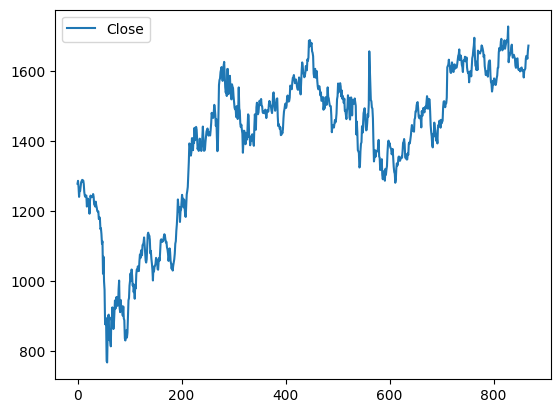

In [ ]:
df.plot.line(y="Close", use_index = True)

In [ ]:
df.reset_index(drop=True, inplace = True)

R-squared (R²) Score: 0.9998948488774488


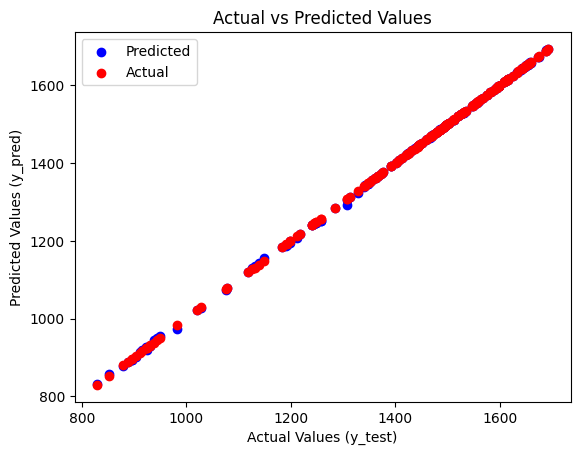

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Features
X = df[['Open','Close', 'High', 'Low', 'Adj Close']]
# Target Values
y = df['Close']

X_train, X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

rf = RandomForestRegressor(n_estimators = 100 , random_state = 42)
#Training
rf.fit(X_train.values, y_train.values)

y_pred = rf.predict(X_test.values)

# Using R-squared to check accuracy in the model
r2 = r2_score(y_test, y_pred)
print("R-squared (R²) Score:", r2)

# Scatter plot of y_pred and y_test
#plt.scatter(y_test, y_pred)
#plt.xlabel('Actual Values (y_test)')
#plt.ylabel('Predicted Values (y_pred)')
#plt.title('Actual vs Predicted Values')
#plt.show()

plt.scatter(y_test, y_pred, color='blue', label='Predicted')  # Scatter plot for y_pred with blue color
plt.scatter(y_test, y_test, color='red', label='Actual')  # Scatter plot for y_test with red color
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted Values')
plt.legend()  # Add legend to differentiate the scatter plots
plt.show()

In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close
863,1640.000000,1657.550049,1639.050049,1643.599976,1643.599976
864,1637.550049,1659.900024,1634.050049,1643.500000,1643.500000
865,1645.000000,1650.750000,1628.699951,1635.550049,1635.550049
866,1642.949951,1672.900024,1638.550049,1658.599976,1658.599976
867,1670.000000,1679.900024,1660.500000,1673.099976,1673.099976


In [ ]:
#Inputting Value of features
initial_array = np.array([['x', 'y', 'z', 'a', 'b']])
updated_array = np.concatenate((initial_array[:-1], df.tail(1).values))
print(updated_array)

#Predicting
predicted_price = rf.predict(updated_array)

print(predicted_price[0])

[['1670.0' '1679.9000244140625' '1660.5' '1673.0999755859375'
  '1673.0999755859375']]
1683.8755090332031
